# Mass Spectroscopy 
- By: Peggy Chen 
- Date: March 16, 2025 
- The goal of this program is to program various problems related to mass spectroscopy. 

In [8]:
%matplotlib inline 
# Import libraries 
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [9]:
# Parameters for plot attributes 
plt.rc("xtick", labelsize="large")
plt.rc("ytick", labelsize="large")
plt.rc("axes", labelsize="xx-large")
plt.rc("axes", titlesize="xx-large")
plt.rc("figure", figsize=(8,8))

## The Lorentz Force - A Charged Particle in Magnetic Field
The Lorentz force is written as: 
$$ \vec{F}_{\mathrm{EM}} = q\left(\vec{E} + \vec{v}\times\vec{B}\right).  $$

## Part A 
A Uranium-235 atom (m = 3.90 x 10^-25 kg) is ionized (meaning an electron has been removed). It is placed (meaning starting from rest) into a uniform electric field created by two vertical parallel plates that are d = 5 cm apart. If the electric field has a magnitude of 50,000 N/C, how fast is the particle moving when it leaves the other side? Code this scenario using Newton’s 2nd Law and the Euler Cromer Method and print out this final velocity. 

In [10]:
# Define key constants 
m_u235 = 3.90e-25 #kg, mass of U-235 atom 
qe = 1.60217e-19 #C, charge of ionized U-235 atom (net positive proton) 
dt = 1.0e-8 #s, Since atoms are so small, we need a tiny step 
t = 0 #s, The starting time 

pos = np.array([0,0,0]) #m, sets initial position (starts at origin in my reference frame) 
v = np.array([0,0,0]) #m/s, sets initial velocity (starts at rest) 

# Create lists for graphing later
xlist = [pos[0]] #m 
ylist = [pos[1]] #m 
zlist = [pos[2]] #m 
tlist = [t] #s 

# Strength of Fields 
B = np.array([0,0,0]) #T, Magnetic field is in the z-direction (none in this example) 
E = np.array([5e4,0,0]) #N/C, Electric field is in the positive x-direction 

# Euler time steps
while pos[0] < 0.05: # Stops when the particle travels the 5 cm from the initial plate to the other plate 
    Fnet = qe * E + qe * np.cross(v,B) #N, Defining net force vector
    a = Fnet / m_u235 #m/s/s, Calculating acceleration vector via Newton's 2nd Law
    v = v + a * dt #m/s, Updating velocity vector 
    pos = pos + v * dt #m, Updating position vector
    t = t + dt #s, Updating time
    
    # Updating lists
    xlist.append(pos[0]) #m 
    ylist.append(pos[1]) #m 
    zlist.append(pos[2]) #m 
    tlist.append(t) #s 

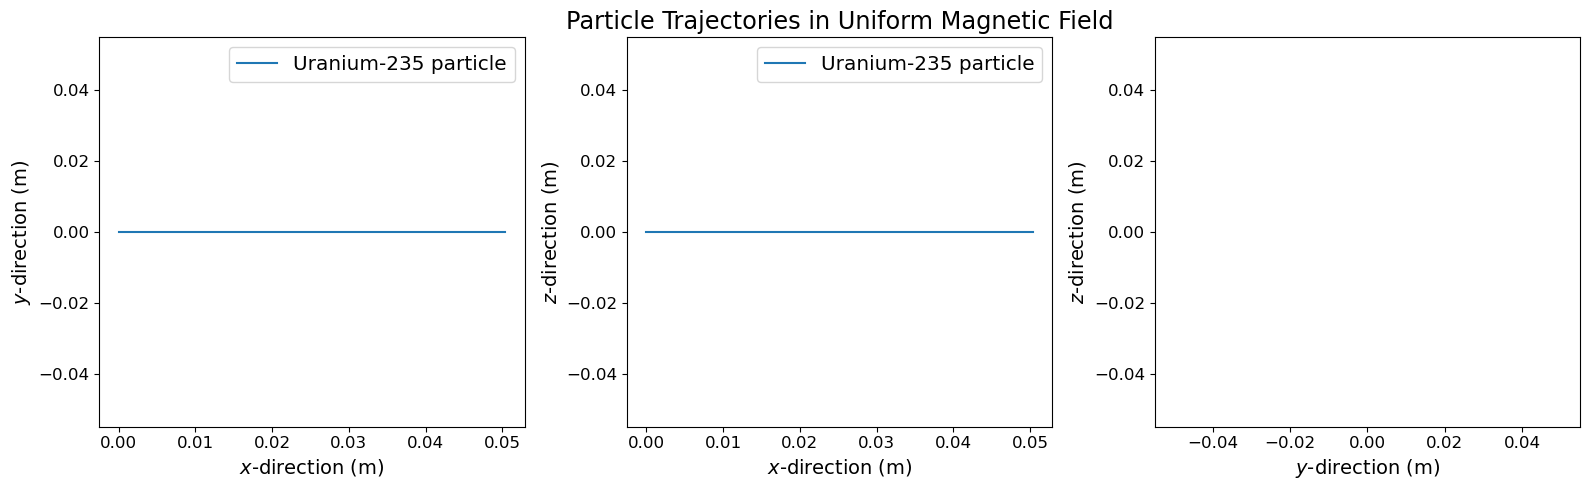

In [11]:
# Graph position, velocity, and acceleration 
fig, axs = plt.subplots(1,3, figsize=(16,5)) # Creates three plots horizontally 

axs[0].plot(xlist, ylist, label="Uranium-235 particle") # Plot the xy-plane 
# Labels axes 
axs[0].set_xlabel("$x$-direction (m)", fontsize = 14) 
axs[0].set_ylabel("$y$-direction (m)", fontsize = 14)
axs[0].legend(fontsize="x-large") # Labels and is visible with large font) 

axs[1].plot(xlist, zlist, label="Uranium-235 particle") # Plots xz-plane 
# Labels axes 
axs[1].set_xlabel("$x$-direction (m)", fontsize = 14)
axs[1].set_ylabel("$z$-direction (m)", fontsize = 14)
axs[1].legend(fontsize="x-large") # Labels and is visible with large font) 
axs[1].set_title("Particle Trajectories in Uniform Magnetic Field") # Sets title that applies to entire figure 

axs[2].plot(ylist, zlist, label="Uranium-235 particle") # Plots the yz-plane 
# Labels axes 
axs[2].set_xlabel("$y$-direction (m)", fontsize = 14)
axs[2].set_ylabel("$z$-direction (m)", fontsize = 14) 

fig.tight_layout() # Corrects overcrowding of the axes 

In [12]:
# Assign the final velocity to a variable called initial_v, since it will be used as a starting value in the following parts of the mass spectrometer 
initial_v = v[0] #m/s 

# Final conclusions 
print('The particle is moving', round(initial_v,2), 'm/s in the x direction as it reaches the second plate.')

The particle is moving 45394.82 m/s in the x direction as it reaches the second plate.


# Part B 
The U-235 atom now enters a second set of horizontal parallel plates with a uniform electric field of 20,000 N/C, but also a uniform magnetic field pointing into the page. Starting with Newton’s 2nd law and a force diagram, calculate the required magnetic field magnitude to allow the atom to move in a straight line through the plates. This is on paper, no code for this question, but you could use your coding skills to verify your answer. (Only paper work will be graded. Most students link to a google drive image to show their work, but it is not the only option.) 

![Image of Work for Magnetic Field Magnitude](https://github.com/chen25p/compphysics/blob/main/MagFieldCalculations.png?raw=true) 

If the image doesn't display, here is a [link](https://drive.google.com/file/d/1XIlJFdMtAniS1PrXrLsFLCylQjt7FEXx/view?usp=sharing). 

# Part C 
Now the U-235 atom enters an area of no electric field, but the magnitude of the magnetic field is the same as you calculated in part b. However, this magnetic field is now pointing out of the page. Using the right hand rule and your knowledge of circular motion, what direction will the particle curve? (Only paper work will be graded. Again, most students link to a google drive image to show their work, but it is not the only option.) 

![Image of Circular Trajectory Direction Calculations](https://github.com/chen25p/compphysics/blob/main/CircularMotionCalculations.png?raw=true) 

Also, here is a [link](https://drive.google.com/file/d/1B6HHe19v7XXgk-qrHNCM_fwlGmPSM3wg/view?usp=sharing), in case it doesn't work! 

# Part D 
Code the scenario described in part c, assuming the velocity is the same as part a. Have your code print out a trajectory graph of the x-y plane of the particle and print out the radius of the circular path of the U-235 atom. Suggested: dt = 2.0E-9 #s and if you are using xlim and ylim, trim down to better fit the scenario 

In [13]:
# Define key constants
m_u235 = 3.90e-25 #kg, mass of U-235 atom 
qe = 1.60217e-19 #C, charge of ionized U-235 atom (net positive proton) 
dt = 2.0e-8 #s, Since atoms are so small, we need a tiny step 
t = 0 #s, The starting time 

pos = np.array([0,0,0]) #m, sets initial position
v = np.array([initial_v,0,0]) #m/s, sets initial velocity

# Create lists for graphing later
xlist = [pos[0]] #m 
ylist = [pos[1]] #m 
zlist = [pos[2]] #m 
tlist = [t] #s 

# Strength of Fields 
B = np.array([0,0,20000/initial_v]) #T, Magnetic field is in the z-direction with context from the problem and values from part a 
E = np.array([0,0,0]) #N/C, No electric field in this part! 

# Coding the while loop to find the radius 
while v[0] >= 0: # Stops when there is no horizontal component of velocity, so we can collect the value of the radius 
    Fnet = qe * E + qe * np.cross(v,B) #N, Defining net force vector
    a = Fnet / m_u235 #m/s/s, Calculating acceleration vector, Newton's 2nd Law
    v = v + a * dt #m/s, Updating velocity vector 
    pos = pos + v * dt #m, Updating position vector
    t = t + dt #s, Updating time
    
    # Updating lists
    xlist.append(pos[0]) #m 
    ylist.append(pos[1]) #m 
    zlist.append(pos[2]) #m 
    tlist.append(t) #s 

In [14]:
print('The radius of the circular path of the U-235 particle is approximately', round(abs(pos[1]),2), 'm.')

The radius of the circular path of the U-235 particle is approximately 0.25 m.


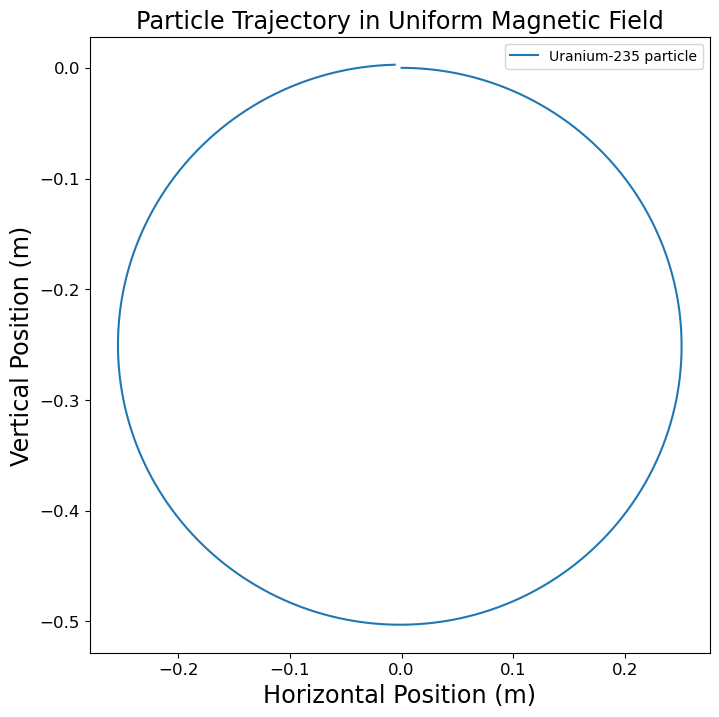

In [15]:
# Coding the while loop for the particle's entire path - not just for the radius 
while pos[1] <= 0.0028: # Completes the trajectory with a certain amount of error from Euler's method 
    Fnet = qe * E + qe * np.cross(v,B) #N, Defining net force vector
    a = Fnet / m_u235 #m/s/s, Calculating acceleration vector, Newton's 2nd Law
    v = v + a * dt #m/s, Updating velocity vector 
    pos = pos + v * dt #m, Updating position vector
    t = t + dt #s, Updating time
    
    # Updating lists
    xlist.append(pos[0]) #m 
    ylist.append(pos[1]) #m 
    zlist.append(pos[2]) #m 
    tlist.append(t) #s 

# Trajectory graph of particle 
plt.plot(xlist, ylist, label="Uranium-235 particle") # Plot trajectory of particle in xy plane 
# Axes labels 
plt.xlabel("Horizontal Position (m)")
plt.ylabel("Vertical Position (m)")
plt.title("Particle Trajectory in Uniform Magnetic Field") # Add title 
plt.legend() # Adds legend 